<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Statistical_Thinking_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Thinking in Python

Exercises from DataCamp
solved by me



In [3]:
import pandas as pd

#Importing csv file from DataCamp asssets
url = "https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv"
df = pd.read_csv(url) #Loading csv file from url into Pandas DataFrame

print(df.head())

  state                                       county  ...  dem_share  east_west
0    AK    State House District 8, Denali-University  ...      50.06       west
1    AK  State House District 37, Bristol Bay-Aleuti  ...      41.24       west
2    AK  State House District 12, Richardson-Glenn H  ...      25.93       west
3    AK      State House District 13, Greater Palmer  ...      24.93       west
4    AK     State House District 14, Greater Wasilla  ...      20.82       west

[5 rows x 8 columns]


## Graphical Exploratory Data Analysis

about exploring newly loaded dataset, plotting data to analyze it visually - used:
* Histogram
* Swarm Plot
* EDCF



In [16]:
#Using Iris dataset
from sklearn.datasets import load_iris
import numpy as np
data = load_iris() 
print(type(data))

<class 'sklearn.utils.Bunch'>


**Plotting a histogram of iris data**
*Import matplotlib.pyplot and seaborn as their usual aliases (plt and sns).
* Use seaborn to set the plotting defaults.
* Plot a histogram of the Iris versicolor petal lengths using plt.hist() and the provided NumPy array versicolor_petal_length.
* Show the histogram using plt.show().

```
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

```

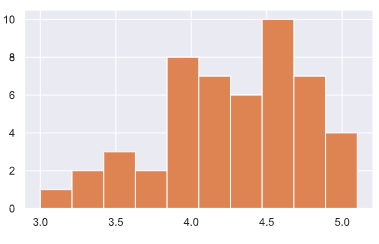

**Labeling the axes**

* Label the axes. Don't forget that you should always include units in your axis labels. Your -axis label is just 'count'. Your -axis label is 'petal length (cm)'. The units are essential!
* Display the plot constructed in the above steps using plt.show().

```
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.ylabel('count')
_ = plt.xlabel('petal length (cm)')


# Show histogram

plt.show()
```
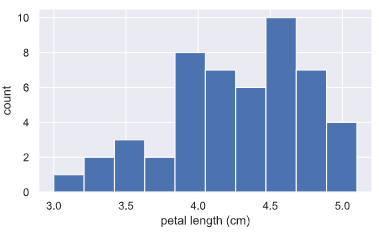

**Adjusting the number of bins in a histogram**

```
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram

plt.hist(versicolor_petal_length, bins=n_bins)
# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()
```

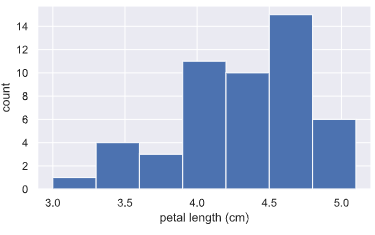

### Plot all of your data: Bee swarm plots

**Swarm plot**

```
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
plt.ylabel('petal length (cm)')
plt.xlabel('species')

# Show the plot

plt.show()
```

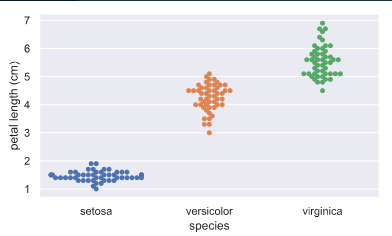

### Plot all of your data: ECDFs

**Computing the ECDF**

Define an EDF function:
* Define a function with the signature ecdf(data). Within the function definition,
* Compute the number of data points, n, using the len() function.
* The -values are the sorted data. Use the np.sort() function to perform the sorting.
* The  data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.
* The function returns the values x and y.

In [1]:
import numpy as np
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


**Plotting the ECDF** 

```
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
plt.xlabel('versicolor_petal_length')
plt.ylabel('ECDF')


# Display the plot
plt.show()
```

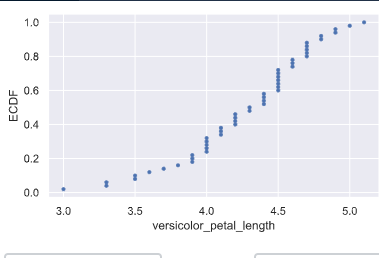

**Comparison of ECDFs**

```
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ =plt.plot(x_set, y_set, marker='.', linestyle='none')
_ =plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ =plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()
```

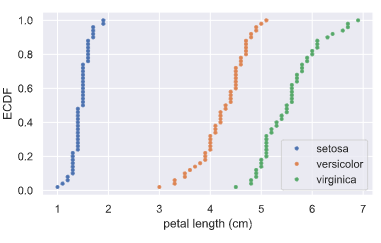

## Quantitative Exploratory Data Analysis

simple summary statistics

**Computing means**

```
# Compute the mean: mean_length_vers
mean_length_vers= np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')
```

### Percentiles, outliers, boxplots

**Computing percentiles**

* Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.
* Use np.percentile() to compute the percentiles of the petal lengths from the Iris versicolor samples. The variable versicolor_petal_length is in your namespace.
* Print the percentiles.

```
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)
```

**Comparing percentiles to ECDF**

```
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot

plt.show()
```

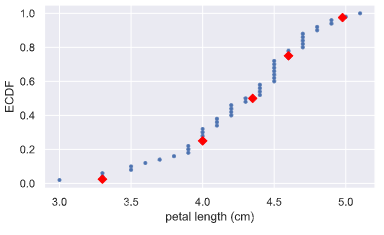


**Box-and-whisker plot**

```
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()
```

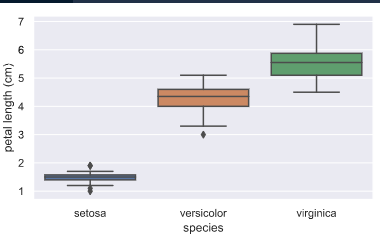

### Variance and standard deviation

**

## Thinking Probabilistically-- Discrete Variables

## Thinking Probabilistically-- Continuous Variables